In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
4382,4382,High,NaN,Poor,NaN,1.0,4.0,No TBI,NaN,3.0,Peripheral blood,No,NaN,NaN,ALL,3.0,-/+,6.0,2.0,G/G,3.0,1.0,NaN,1.0,2.0,PB,Poor,RIC,Not Hispanic or Latino,2019,No,NaN,No,Permissive,1.0,NaN,49.146,NaN,1.0,NaN,33.028,1.0,Cyclophosphamide alone,NaN,M-M,1.0,American Indian or Alaska Native,NaN,70.0,NaN,Permissive mismatched,Related,MEL,4.0,NaN,1.0,NaN,6.0,1.0,2.799
6166,6166,High,No,Favorable,NaN,NaN,NaN,No TBI,NaN,NaN,Peripheral blood,No,No,NaN,MPN,NaN,+/+,NaN,NaN,NaN,NaN,NaN,No,NaN,2.0,PB,Intermediate,No drugs reported,Not Hispanic or Latino,2016,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,No,55.775,NaN,FK+ MTX +- others(not MMF),NaN,M-F,NaN,White,1.0,60.0,NaN,NaN,Related,"N/A, Mel not given",NaN,NaN,NaN,Yes,NaN,0.0,43.445
16353,16353,Low,Yes,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,Not done,AML,6.0,-/-,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,NaN,NaN,Not Hispanic or Latino,2018,No,NaN,Yes,Permissive,2.0,No,65.847,No,2.0,No,51.869,2.0,FK+ MTX +- others(not MMF),No,F-F,2.0,Native Hawaiian or other Pacific Islander,3.0,90.0,No,Permissive mismatched,Multiple donor (non-UCB),MEL,8.0,No,2.0,No,10.0,0.0,32.451
6143,6143,N/A - pediatric,Yes,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,Yes,No,No,HD,6.0,+/-,10.0,2.0,H/H,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,Negative,Yes,NaN,2.0,No,63.627,No,2.0,No,0.044,2.0,FK+ MMF +- others,No,F-F,2.0,Asian,4.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,24.874
8492,8492,N/A - non-malignant indication,No,TBD,Yes,1.0,NaN,No TBI,No,3.0,Peripheral blood,No,No,No,AML,NaN,+/+,NaN,1.0,NaN,3.0,NaN,No,1.0,1.0,PB,TBD,MAC,Not Hispanic or Latino,2017,No,Positive,Yes,NaN,1.0,No,35.019,No,1.0,No,56.189,1.0,Cyclophosphamide +- others,No,F-F,NaN,American Indian or Alaska Native,0.0,90.0,No,NaN,Related,MEL,NaN,No,1.0,Yes,NaN,0.0,35.475
6559,6559,High,No,Poor,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,G/B,6.0,2.0,No,2.0,1.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,NaN,Yes,GvH non-permissive,2.0,No,NaN,No,2.0,No,0.044,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,9.0,0.0,108.309
12864,12864,High,No,Poor,No,1.0,4.0,No TBI,No,3.0,Peripheral blood,No,No,No,AML,3.0,-/-,5.0,1.0,NaN,3.0,1.0,No,1.0,1.0,PB,TBD,RIC,Not Hispanic or Latino,2018,No,NaN,No,NaN,1.0,No,71.960,No,1.0,No,63.962,1.0,Cyclophosphamide alone,No,M-F,1.0,American Indian or Alaska Native,1.0,70.0,No,NaN,Related,"N/A, Mel not given",4.0,No,1.0,Yes,5.0,1.0,3.920
4927,4927,Intermediate,No,Intermediate,No,2.0,8.0,TBI + Cy +- Other,No,6.0,Bone marrow,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,NMA,Not Hispanic or Latino,2017,No,Negative,No,Permissive,2.0,No,59.305,No,2.0,No,0.295,2.0,NaN,No,M-F,2.0,American Indian or Alaska Native,0.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,1.0,10.948
13256,13256,NaN,No,NaN,No,1.0,4.0,No TBI,No,3.0,Peripheral blood,No,No,No,NHL,3.0,+/+,5.0,1.0,P/P,3.0,1.0,No,1.0,2.0,PB,NaN,NMA,Not Hispanic or Latino,2018,No,NaN,No,NaN,1.0,No,64.914,No,1.0,No,65.051,1.0,Cyclophosphamide alone,No,M-M,1.0,American Indian or Alaska Native,0.0,90.0,No,NaN,Related,MEL,4.0,No,1.0,No,6.0,0.0,22.045
1188

In [ ]:
pd.set_option('display.max_columns', None)


path="/datasets/equity-post-HCT-survival-predictions/train.csv"
df=pd.read_csv(path)
df.sample(20)

In [19]:
pd.set_option('display.max_colwidth', None)
path_d="/datasets/equity-post-HCT-survival-predictions/data_dictionary.csv"
df_d=pd.read_csv(path_d)
df_d.sample(55)

,variable,description,type,values
35,donor_age,Donor age,Numerical,NaN
31,in_vivo_tcd,In-vivo T-cell depletion (ATG/alemtuzumab),Categorical,['Yes' 'No' nan]
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant indication' 'N/A - pediatric'\n 'High - TED AML case <missing cytogenetics' 'TBD cytogenetics' 'Low'\n 'Intermediate - TED AML case <missing cytogenetics'\n 'N/A - disease not classifiable' nan 'Very high' 'Missing disease status']
33,hla_match_a_high,Recipient / 1st donor allele level (high resolution) matching at HLA-A,Numerical,NaN
38,peptic_ulcer,Peptic ulcer,Categorical,['No' nan 'Yes' 'Not done']
23,hla_match_dqb1_low,Recipient / 1st donor antigen level (low resolution) matching at HLA-DQB1,Numerical,NaN
37,hla_match_b_low,Recipient / 1st donor antigen level (low resolution) matching at HLA-B,Numerical,NaN
10,vent_hist,History of mechanical ventilation,Categorical,['No' 'Yes' nan]
57,efs,Event-free survival,Categorical,['Event' 'Censoring']
54,hla_match_drb1_high,Recipient / 1st donor allele level (high resolution) matching at HLA-DRB1,Numerical,NaN


In [ ]:
#Data exploration


In [8]:
def initial_exploration(data):
    print("Dimensions:", data.shape)
    print("\nData type:")
    print(data.dtypes)
    print("\nNull values:")
    print(data.isnull().sum())
    print("\nEstadísticas descriptivas:")
    print(data.describe())

initial_exploration(df)

Dimensiones: (28800, 60)

Tipos de datos:
ID                          int64
dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
hla_match_c_high          float64
hla_high_res_8            float64
tbi_status                 object
arrhythmia                 object
hla_low_res_6             float64
graft_type                 object
vent_hist                  object
renal_issue                object
pulm_severe                object
prim_disease_hct           object
hla_high_res_6            float64
cmv_status                 object
hla_high_res_10           float64
hla_match_dqb1_high       float64
tce_imm_match              object
hla_nmdp_6                float64
hla_match_c_low           float64
rituximab                  object
hla_match_drb1_low        float64
hla_match_dqb1_low        float64
prod_type                  object
cyto_score_detail          object
conditioning_intensity     object
ethnic

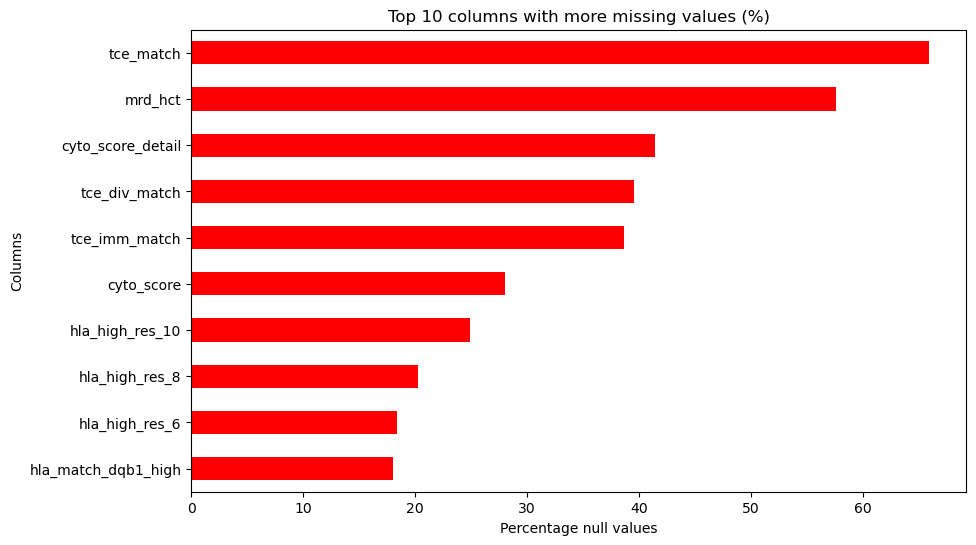

In [30]:

# Calcular el porcentaje de valores nulos para cada columna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Seleccionar las 10 columnas con más valores nulos
top_missing_cols = missing_percentage.sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
top_missing_cols.sort_values().plot(kind='barh', color='red')
plt.title("Top 10 columns with more missing values (%)")
plt.xlabel("Percentage null values")
plt.ylabel("Columns")
plt.show()


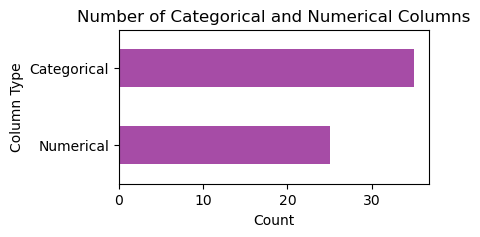

In [33]:
# Identificar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Contar el número de columnas de cada tipo
column_counts = {
    'Categorical': len(categorical_cols),
    'Numerical': len(numerical_cols)
}

# Crear un DataFrame para el gráfico
column_counts_df = pd.DataFrame.from_dict(column_counts, orient='index', columns=['Count'])

# Plot del gráfico de barras horizontales
plt.figure(figsize=(4, 2))
column_counts_df['Count'].sort_values().plot(kind='barh', color='purple', alpha=0.7)
plt.title("Number of Categorical and Numerical Columns")
plt.xlabel("Count")
plt.ylabel("Column Type")
plt.show()

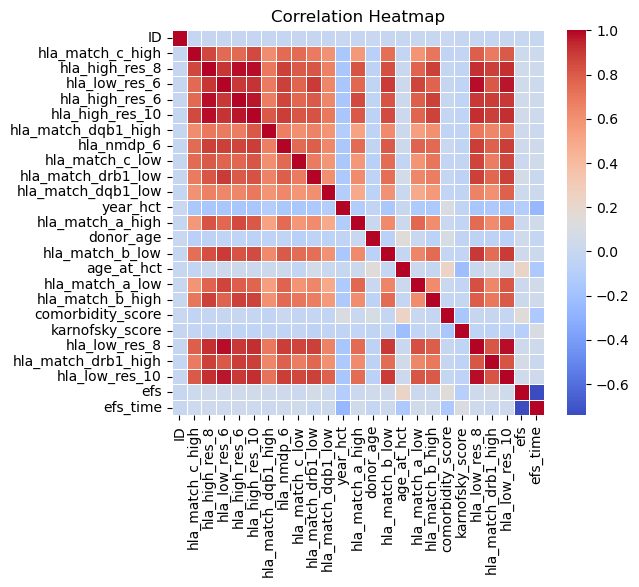

In [39]:
# Correlation Heatmap
correlation_matrix = df.corr()

# Create it
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

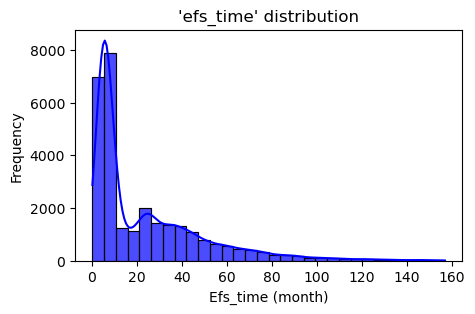

In [42]:
# Crear un gráfico de distribución para la columna 'efs_time'
plt.figure(figsize=(5, 3))
sns.histplot(df['efs_time'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title("'efs_time' distribution")
plt.xlabel("Efs_time (month)")
plt.ylabel("Frequency")
plt.show()